In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

In [2]:
def cost(X, y, w, b):
    m = len(X)
    return (sum([((np.dot(X[i], w) + b) - y[i])**2 for i in range(m)])/(2*m))

def z_score_normalization(X):
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    return (X-mean)/std, mean, std

def get_partials(X, y, w, b):
    m, n = np.shape(X)
    dw = np.zeros(n)
    db = 0

    for j in range(n):
        x = X[:,j]
        dw[j] = (sum([((np.dot(X[i], w) + b) - y[i]) * x[i] for i in range(m)]))/m
    db = (sum([((np.dot(X[i], w) + b) - y[i]) for i in range(m)]))/m
    return dw, db

def gradient_descent(X, y, iter, alpha):
    n = len(X[0])
    w = np.zeros(n)
    b = 0
    hist = np.array([])
    for i in range(iter):
        dw, db = get_partials(X, y, w, b)
        w = w - alpha * dw
        b = b - alpha * db
        if i<100000: 
            hist = np.append(hist, cost(X, y, w, b))
    return w, b, hist

def plot_cost(hist):
    plt.plot(range(0, len(hist)), hist, label='Cost Function')

    plt.xlabel('Number of Iterations')
    plt.ylabel('Cost Function')
    plt.title('Cost Function vs. Number of Iterations')

    plt.legend()

    plt.show()

def plot_model(x, y, X, model_w, model_b):
    plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Model")
    plt.plot(x,X@model_w + model_b, label="Predicted Value");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()   

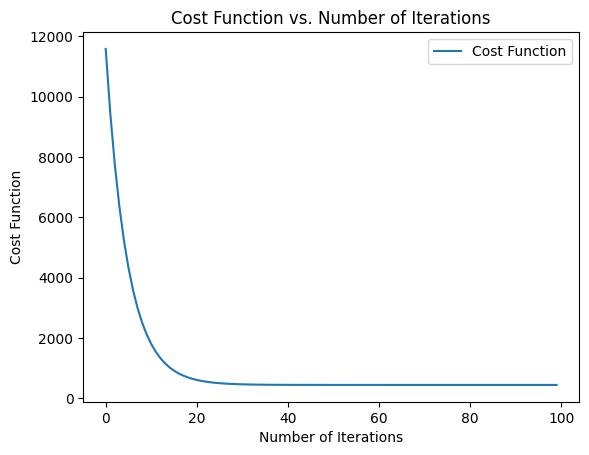

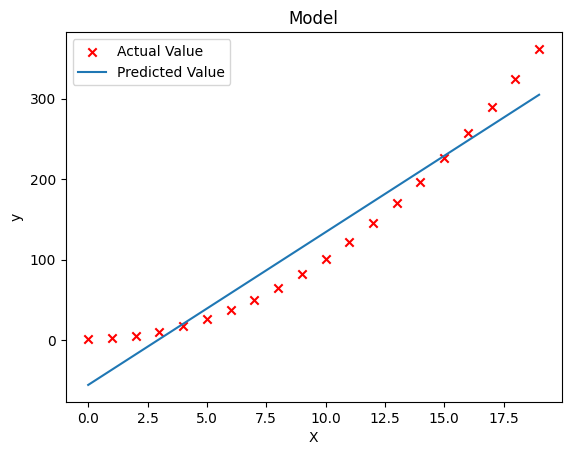

In [3]:
x = np.arange(0, 20, 1)
X = x.reshape(-1, 1)
y = x**2 + 1
X_norm, mean, std = z_score_normalization(X)
w, b, hist = gradient_descent(X_norm, y, 100, 0.1)
plot_cost(hist)
plot_model(x, y, X_norm, w, b)

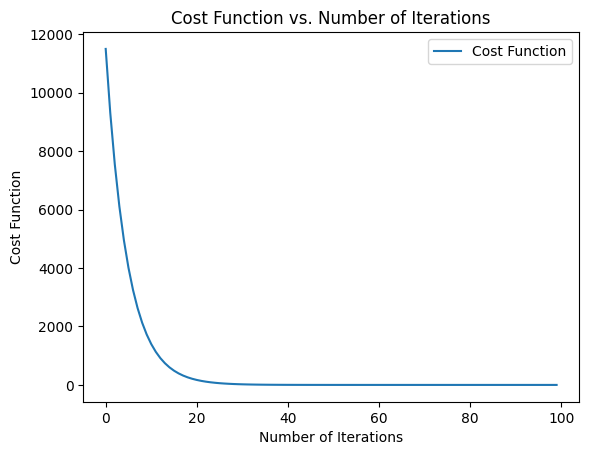

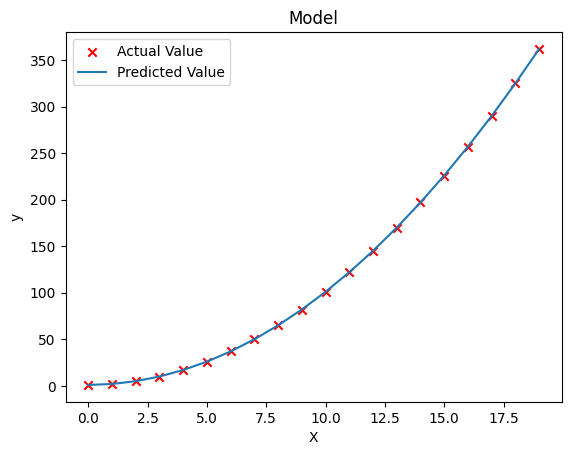

In [4]:
x = np.arange(0, 20, 1)
X = x.reshape(-1, 1)
y = x**2 + 1
X_norm, mean, std = z_score_normalization(X**2)
w, b, hist = gradient_descent(X_norm, y, 100, 0.1)
plot_cost(hist)
plot_model(x, y, X_norm, w, b)

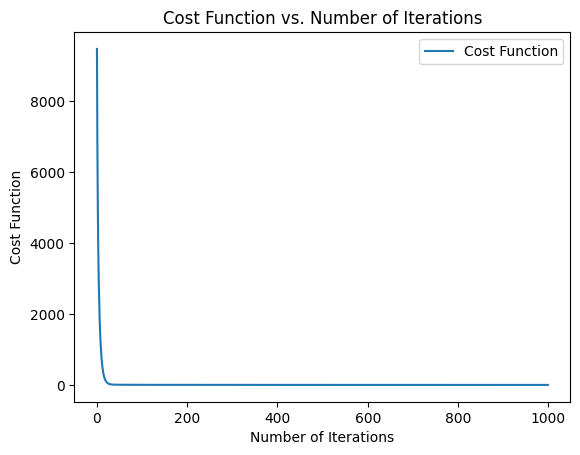

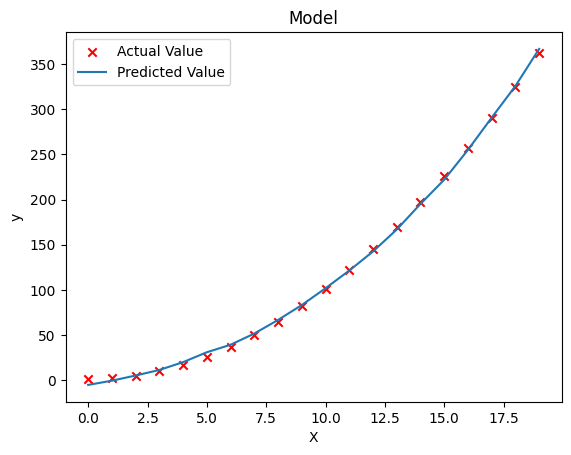

[24.57 49.06 41.43  0.9 ] 124.49999999999994


In [5]:
x = np.arange(0, 20, 1)
y = x**2 + 1
X = np.c_[x, x**2, x**3, x**20]
X_norm, mean, std = z_score_normalization(X)
w, b, hist = gradient_descent(X_norm, y, 1000, 0.1)
plot_cost(hist)
plot_model(x, y, X_norm, w, b)
print(w, b)

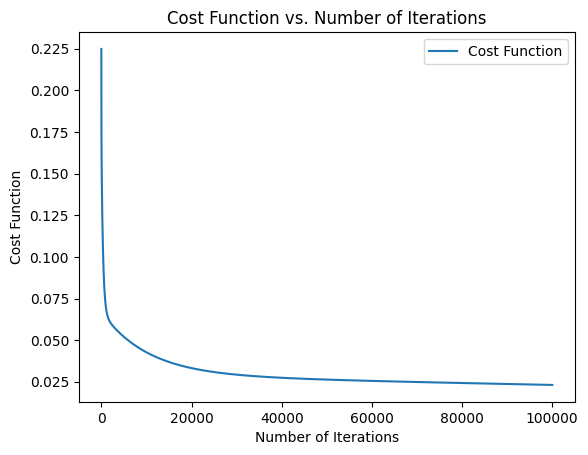

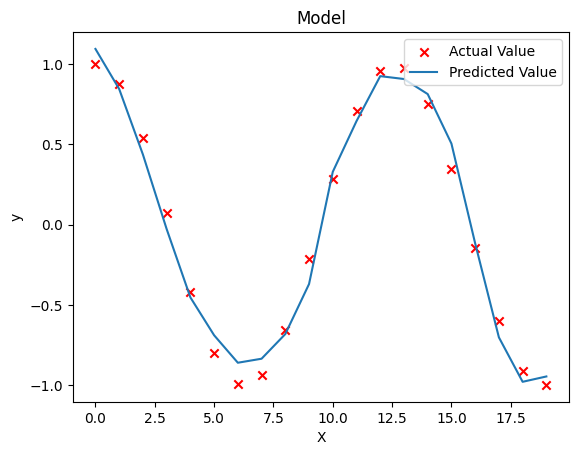

[-7.77e-01 -1.51e+01  3.82e+01 -1.39e+00 -2.86e+01 -1.68e+01  2.41e+01
 -2.77e-02 -7.47e-03  6.50e-02  1.31e-01 -1.32e-02  6.75e-02] -0.007287194855839186


In [6]:
x = np.arange(0, 20, 1)
y = np.cos(x/2)
X = np.c_[x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X_norm, mean, std = z_score_normalization(X)
w, b, hist = gradient_descent(X_norm, y, 2000000, 0.1)
plot_cost(hist)
plot_model(x, y, X_norm, w, b)
print(w, b)